<a href="https://colab.research.google.com/github/MujeebDawar/Machine-Learning/blob/main/MachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix


# **1. Dataset Selection**
Player statistics from esport game **"Dota 2"**.

**Dataset Structure**

The dataset includes features and a target variable.
The target variable is the game winner, encoded as:

1: Radiant team wins.

-1: Dire team wins.

The target column is likely named '-1' in  data, and the rest of the columns represent features.


# **2. Preprocessing the Data**

**2.1: Load the Datasets**
Use pandas to read the dataset (e.g., .csv or .xlsx).

In [ ]:
# File Path
train_path = '/content/drive/MyDrive/dota2+games+results/dota2Train.csv'
test_path = '/content/drive/MyDrive/dota2+games+results/dota2Test.csv'

# Load the dataset files dota2Train.csv and dota2Test.csv.
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display basic information
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92649 entries, 0 to 92648
Columns: 117 entries, -1 to 0.102
dtypes: int64(117)
memory usage: 82.7 MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10293 entries, 0 to 10292
Columns: 117 entries, -1 to 0.102
dtypes: int64(117)
memory usage: 9.2 MB
None


**2.2 Check Dataset Structure**

Inspect the first few rows of the training and testing data.

In [ ]:
print("First few rows of Train Data:")
print(train_data.head())

print("\nFirst few rows of Test Data:")
print(test_data.head())


First few rows of Train Data:
   -1  223  2  2.1  0  0.1  0.2  0.3  0.4  0.5  ...  0.93  0.94  0.95  0.96  \
0   1  152  2    2  0    0    0    1    0   -1  ...     0     0     0     0   
1   1  131  2    2  0    0    0    1    0   -1  ...     0     0     0     0   
2   1  154  2    2  0    0    0    0    0    0  ...    -1     0     0     0   
3  -1  171  2    3  0    0    0    0    0   -1  ...     0     0     0     0   
4   1  122  2    3  0    1    0    0    0    0  ...     1     0     0     0   

   0.97  0.98  0.99  0.100  0.101  0.102  
0     0     0     0      0      0      0  
1     0     0     0      0      0      0  
2     0     0     0      0      0      0  
3     0     0     0      0      0      0  
4     0     0     0      0      0     -1  

[5 rows x 117 columns]

First few rows of Test Data:
   -1  223  8  2  0  -1.1  0.1  0.2  0.3  0.4  ...  -1.5  0.94  0.95  0.96  \
0   1  227  8  2  0     0    0    0    0    0  ...    -1     0     0     0   
1  -1  136  2  2  1     0  

# **3. Preprocessing**
Apply the preprocessing steps to both datasets:

**3.1 Handle Missing Values**

Check and handle missing values in both datasets.


In [ ]:
# Check for missing values
print("Missing Values in Train Data:\n", train_data.isnull().sum())
print("Missing Values in Test Data:\n", test_data.isnull().sum())

# Fill missing values (if any)
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)


Missing Values in Train Data:
 -1       0
223      0
2        0
2.1      0
0        0
        ..
0.98     0
0.99     0
0.100    0
0.101    0
0.102    0
Length: 117, dtype: int64
Missing Values in Test Data:
 -1       0
223      0
8        0
2        0
0        0
        ..
0.98     0
0.99     0
0.100    0
0.101    0
0.102    0
Length: 117, dtype: int64


**3.2 Scale Features**

Scale numerical features using StandardScaler.

In [ ]:
# Separate features and target
target_column = '-1'  # Target column indicating the winner
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]

X_test = test_data.drop(columns=[target_column])
y_test = test_data[target_column]

# Align columns in X_test with X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Verify alignment
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

# Scale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both datasets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Columns in X_train: Index(['223', '2', '2.1', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6',
       ...
       '0.93', '0.94', '0.95', '0.96', '0.97', '0.98', '0.99', '0.100',
       '0.101', '0.102'],
      dtype='object', length=116)
Columns in X_test: Index(['223', '2', '2.1', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6',
       ...
       '0.93', '0.94', '0.95', '0.96', '0.97', '0.98', '0.99', '0.100',
       '0.101', '0.102'],
      dtype='object', length=116)


# **4. Exploratory Data Analysis (EDA)**

**4.1 Visualize Target Distribution**
Visualize the distribution of the target variable.

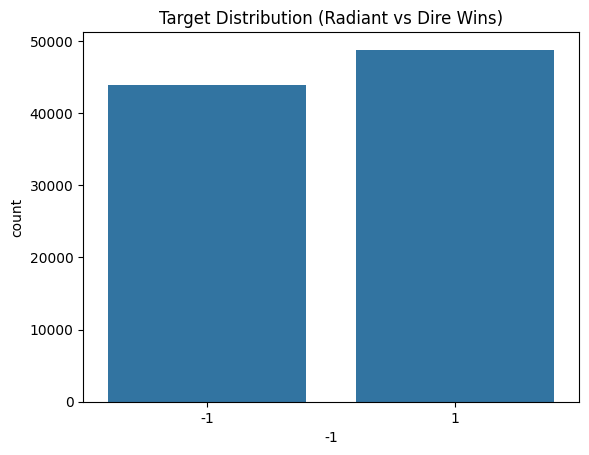

In [ ]:
sns.countplot(x=y_train)
plt.title("Target Distribution (Radiant vs Dire Wins)")
plt.show()

**4.2 Correlation Analysis**

Correlation analysis is a statistical technique used to measure the strength and direction of the relationship between two or more variables. In the context of datasets, it helps you understand how one feature is related to another,

The most commonly used measure of correlation is Pearson’s correlation coefficient, which ranges from -1 to +1:

+1: Perfect positive correlation (as one variable increases, the other increases proportionally).

0: No correlation (the variables are independent of each other).

-1: Perfect negative correlation (as one variable increases, the other decreases proportionally).


**Check correlations between features.**

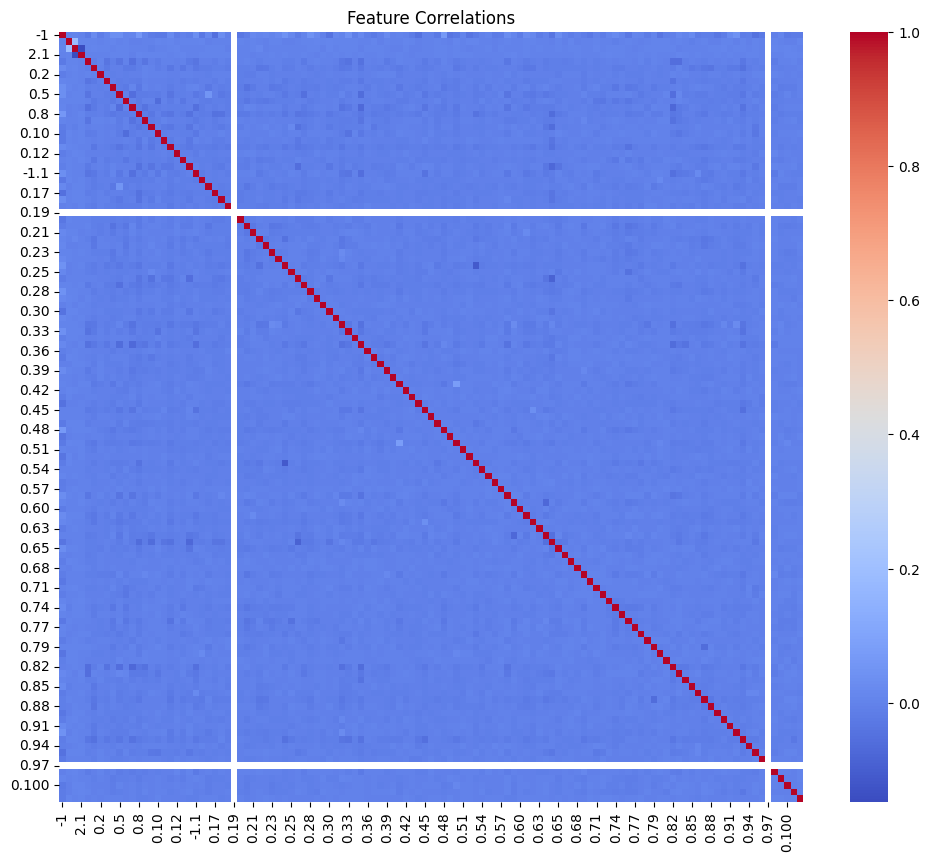

In [ ]:
# Create a heatmap of feature correlations
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlations")
plt.show()


# **5. Feature Engineering**

**5.1 Feature Selection**

Select the most relevant features using feature importance from a Random Forest model.

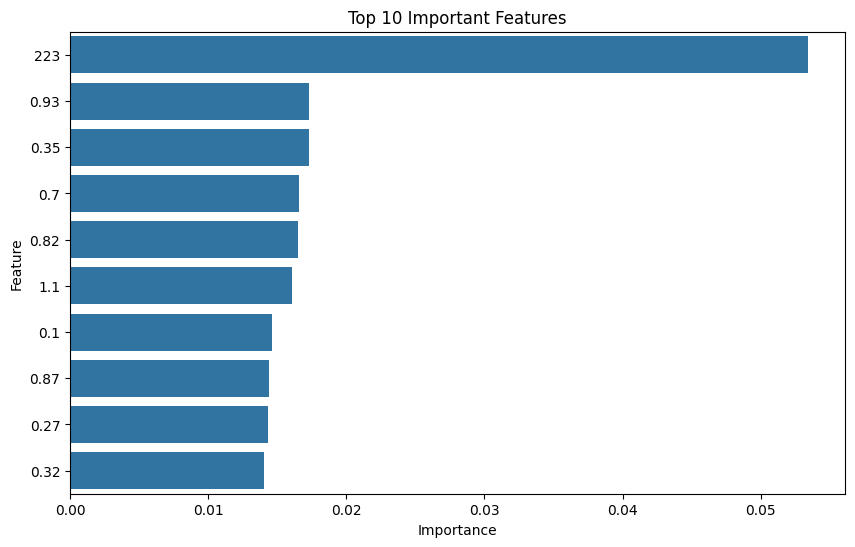

In [ ]:
# Train a basic Random Forest to identify important features
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title("Top 10 Important Features")
plt.show()


# **6. Model Implementation**


**6.1 Train Models**

Train multiple machine learning models for comparison (e.g., Random Forest, Logistic Regression,Decision Tree,Svm,gradient Boosting).

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Define models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
   # "SVM": SVC(probability=True, random_state=42), take so much time
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "AUC-ROC": auc
    }

    # Print classification report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Training Logistic Regression...

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

          -1       0.49      0.41      0.45      4791
           1       0.55      0.62      0.58      5502

    accuracy                           0.52     10293
   macro avg       0.52      0.52      0.51     10293
weighted avg       0.52      0.52      0.52     10293

Training Decision Tree...

Classification Report for Decision Tree:

              precision    recall  f1-score   support

          -1       0.46      0.48      0.47      4791
           1       0.53      0.52      0.52      5502

    accuracy                           0.50     10293
   macro avg       0.50      0.50      0.50     10293
weighted avg       0.50      0.50      0.50     10293

Training Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

          -1       0.47      0.41      0.44      4791
           1      

**6.2 ROC Curve for Selected Models**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

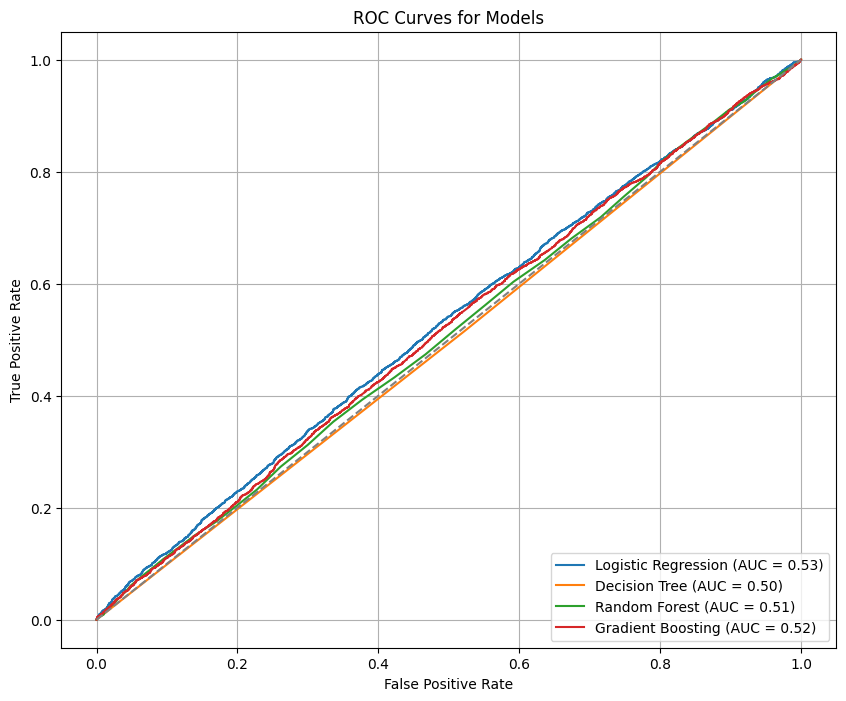

In [ ]:
# Initialize a figure for the ROC curves
plt.figure(figsize=(10, 8))

# Loop through each model
for model_name, model in models.items():
    # Predict probabilities if the model supports it
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # For models like SVM, use decision function
        y_proba = model.decision_function(X_test_scaled)

    # Compute the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

# Plot the random chance line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Add labels, legend, and title
plt.title("ROC Curves for Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# **7. Model Improvement**

**7.1 Hyperparameter Tuning**

Optimize the best-performing model using GridSearchCV or RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=500),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 10]
        }
    }
}

# Dictionary to store the results
best_models = {}

# Loop through models and perform GridSearchCV
for model_name, config in param_grids.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Store the best model and its performance
    best_models[model_name] = {
        "best_model": grid_search.best_estimator_,
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_
    }
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Accuracy for {model_name}: {grid_search.best_score_:.4f}\n")

# Summary of best models
for model_name, result in best_models.items():
    print(f"{model_name} - Best Parameters: {result['best_params']}, Best Accuracy: {result['best_score']:.4f}")


Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2'}
Best Accuracy for Logistic Regression: 0.5990

Tuning Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Best Accuracy for Decision Tree: 0.5499

Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy for Random Forest: 0.5831

Tuning Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best Accuracy for Gradient Boosting: 0.5923

Logistic Regression - Best Parameters: {'C': 0.01, 'penalty': 'l2'}, Best Accuracy: 0.5990
Decision Tree - Best Parameters: {'max_depth': 10, 'min_samples_split': 5}, Best Accuracy: 0.5499
Random Forest - Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}, Best Accuracy: 0.5831
Gradient Boosting - Best Parameters: {'learning_rate': 0.2, 'm

# **8. Evaluation and Reporting**


**8.1 Final Model Evaluation**

Evaluate the tuned model on the test data.

Evaluating Logistic Regression...

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

          -1       0.49      0.41      0.45      4791
           1       0.55      0.62      0.58      5502

    accuracy                           0.52     10293
   macro avg       0.52      0.52      0.51     10293
weighted avg       0.52      0.52      0.52     10293



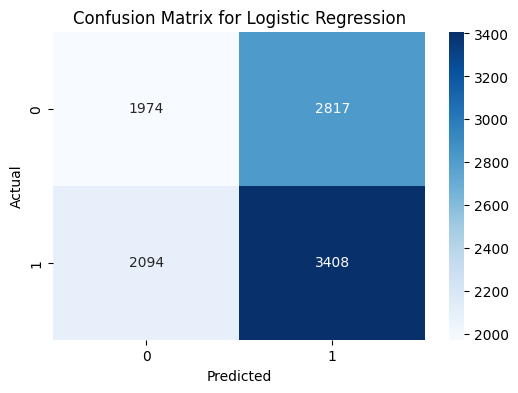

Evaluating Decision Tree...

Classification Report for Decision Tree:

              precision    recall  f1-score   support

          -1       0.47      0.26      0.33      4791
           1       0.53      0.74      0.62      5502

    accuracy                           0.52     10293
   macro avg       0.50      0.50      0.48     10293
weighted avg       0.50      0.52      0.49     10293



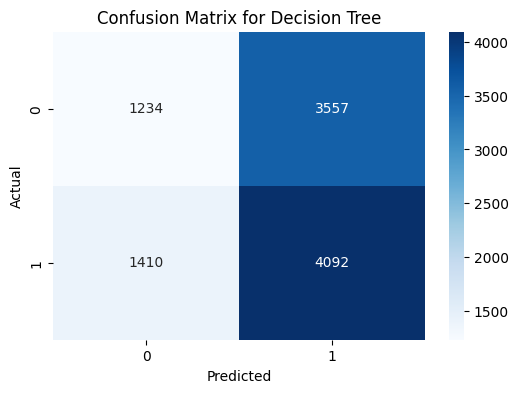

Evaluating Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

          -1       0.48      0.39      0.43      4791
           1       0.54      0.63      0.59      5502

    accuracy                           0.52     10293
   macro avg       0.51      0.51      0.51     10293
weighted avg       0.51      0.52      0.51     10293



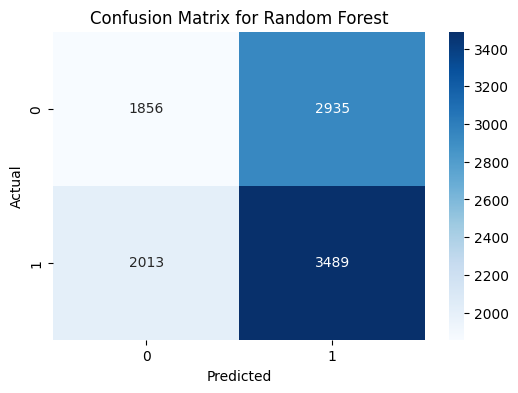

Evaluating Gradient Boosting...

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

          -1       0.48      0.36      0.41      4791
           1       0.54      0.66      0.59      5502

    accuracy                           0.52     10293
   macro avg       0.51      0.51      0.50     10293
weighted avg       0.51      0.52      0.51     10293



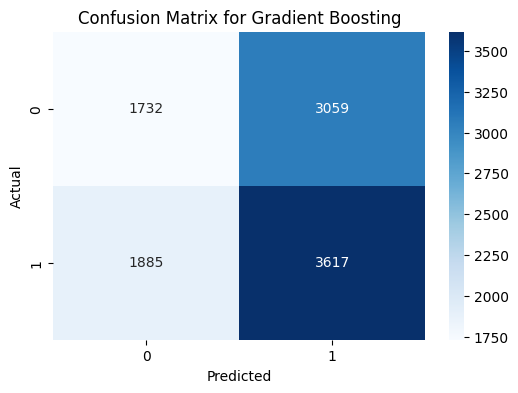


Final Model Performance Comparison:
                     Accuracy  F1-Score   AUC-ROC
Logistic Regression  0.522880  0.581223  0.526347
Decision Tree        0.517439  0.622310  0.500100
Random Forest        0.519285  0.585108  0.515777
Gradient Boosting    0.519674  0.594022  0.519381


In [ ]:

import seaborn as sns

# Evaluate each best model on the test set
final_results = {}

for model_name, result in best_models.items():
    print(f"Evaluating {model_name}...")

    # Get the best model
    best_model = result["best_model"]

    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Store the results
    final_results[model_name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "AUC-ROC": auc
    }

    # Print classification report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Display final results in a DataFrame
final_results_df = pd.DataFrame(final_results).T
print("\nFinal Model Performance Comparison:")
print(final_results_df)
